<a href="https://colab.research.google.com/github/lucarenz1997/recommender_systems/blob/main/data-prep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preparation
**Authors** : Rafaella and Luca

In [30]:
from google.colab import drive
drive.mount('/content/drive')

# Loading the dataset
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/Recommender/train.csv")


import warnings
# Suppress all warnings
warnings.filterwarnings("ignore")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Datatype Conversion and Missing Values handling

In [31]:
data.isnull().sum() # no NAs

# Converting to datatypes
data['ts_listen'] = pd.to_datetime(data['ts_listen'], unit='s')
data['artist_id'] = data['artist_id'].astype('category')
data['media_id'] = data['media_id'].astype('category')
data['genre_id'] = data['genre_id'].astype('category')
data['user_gender'] = data['user_gender'].astype('bool')
data['is_listened'] = data['is_listened'].astype('bool')
data['album_id'] = data['album_id'].astype('category')
data['context_type'] = data['context_type'].astype('category')
data['platform_name'] = data['platform_name'].astype('category')
data['release_date'] = pd.to_datetime(data['release_date'], format='%Y%m%d', errors='coerce')
data['listen_type'] = data['listen_type'].astype('category')
data['platform_family'] = data['platform_family'].astype('category')
data['user_id'] = data['user_id'].astype('category')

print(data.dtypes)

genre_id                 category
ts_listen          datetime64[ns]
media_id                 category
album_id                 category
context_type             category
release_date       datetime64[ns]
platform_name            category
platform_family          category
media_duration              int64
listen_type              category
user_gender                  bool
user_id                  category
artist_id                category
user_age                    int64
is_listened                  bool
dtype: object


In [32]:
data = data.dropna(subset=['release_date'])

## EDA

In [5]:
# Number of unique user_id and media_id
num_unique_users = data['user_id'].nunique()
num_unique_media = data['media_id'].nunique()

# Average number of unique media per user
mean_media_per_user = data.groupby('user_id')['media_id'].nunique().mean()
# Average number of unique users per media
mean_users_per_media = data.groupby('media_id')['user_id'].nunique().mean()

# Print results
print(f"Number of unique user_id: {num_unique_users}")
print(f"Number of unique media_id: {num_unique_media}")
print(f"Average number of unique media_id per user_id: {mean_media_per_user:.2f}")
print(f"Average number of unique user_id per media_id: {mean_users_per_media:.2f}")

Anzahl unterschiedlicher user_id: 19918
Anzahl unterschiedlicher media_id: 452965
Durchschnittliche Anzahl unterschiedlicher media_id pro user_id: 199.59
Durchschnittliche Anzahl unterschiedlicher user_id pro media_id: 8.78


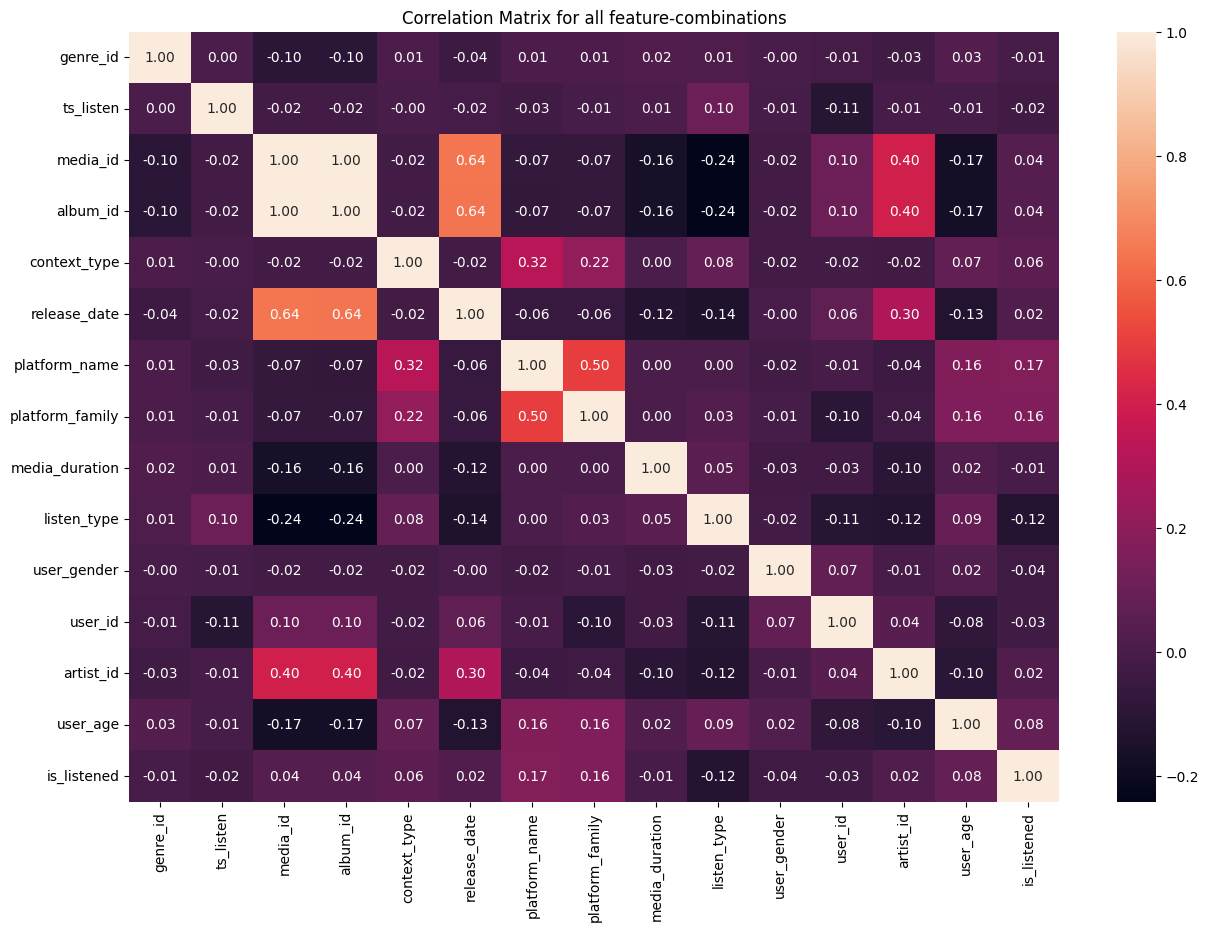

In [29]:
import seaborn as sns
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True, fmt='.2f')
plt.title('Correlation Matrix for all feature-combinations')
plt.show()

## Outlier Removal
### Numerical data
This subchapter shows how outliers were identified and removed using one of the outlier removal methods called IQR.

In [6]:
# Remove outliers using the IQR method
def remove_outliers(df, col):
    q_1 = df[col].quantile(0.25)
    q_3 = df[col].quantile(0.75)
    IQR = q_3 - q_1
    lower_bound = q_1 - 1.5 * IQR
    upper_bound = q_3 + 1.5 * IQR
    print(f"Removing outliers from {col} with lower boundary of {lower_bound} and upper boundary of {upper_bound}")
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

Removing outliers from media_duration with lower boundary of 109.0 and upper boundary of 341.0


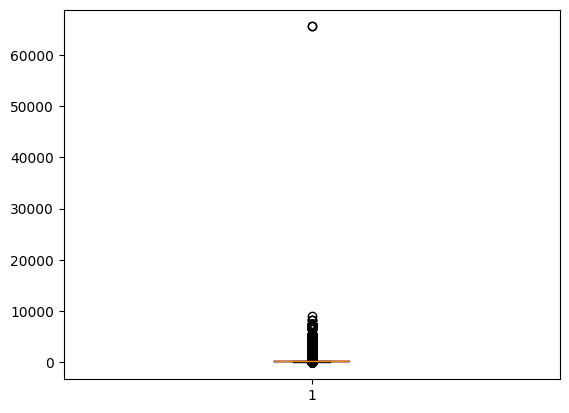

In [7]:
import matplotlib.pyplot as plt
plt.boxplot(data['media_duration']) # quite a few songs that seem to last for hours or even days. Let's remove them.

data = remove_outliers(data,'media_duration')

When analyzing ts_listen, it was shown that most of the timestamps were after 2016 while less than one thousand songs were listened before 2016. Therefore, it has been decided to remove outliers.

ts_listen
1970-12-31        237
1973-12-31          0
1976-12-31          0
1979-12-31          0
1982-12-31        379
1985-12-31          0
1988-12-31          0
1991-12-31          0
1994-12-31          0
1997-12-31          1
2000-12-31          0
2003-12-31          2
2006-12-31          0
2009-12-31        108
2012-12-31         12
2015-12-31         48
2018-12-31    7151901
Freq: 3YE-DEC, dtype: int64
Removing outliers from ts_listen with lower boundary of 2016-10-15 13:10:32.375000320 and upper boundary of 2016-12-13 21:35:53.374999808


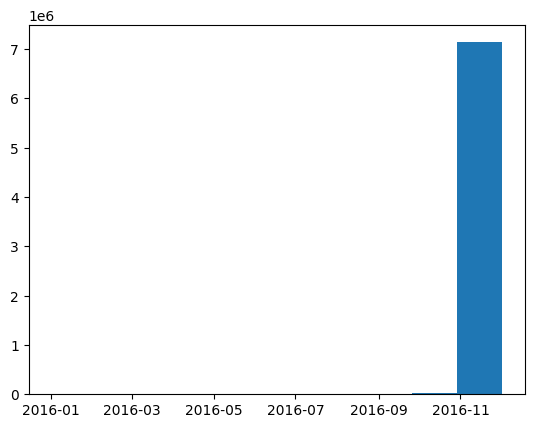

In [8]:
# Grouping by 5-year intervals to see the approximate counts
grouped_data = data.groupby(pd.Grouper(key='ts_listen', freq='3YE')).size()
print(grouped_data) # We can start at 2016

len(data[data['ts_listen'] < pd.Timestamp('2015-12-31')])

tmp = data[data['ts_listen'] > pd.Timestamp('2015-12-31')]
plt.hist(tmp['ts_listen'])

# outlier removal
data = remove_outliers(data,'ts_listen')

(array([5.40000e+01, 1.21000e+02, 3.70000e+02, 7.58000e+02, 9.34000e+02,
        9.97000e+02, 1.38700e+03, 1.29000e+03, 1.78700e+03, 2.02100e+03,
        2.73500e+03, 4.90800e+03, 5.19500e+03, 3.65690e+04, 3.24259e+05,
        3.85581e+05, 4.01821e+05, 3.85558e+05, 2.77370e+05, 2.81870e+05,
        3.18830e+05, 3.33942e+05, 3.66025e+05, 3.00396e+05, 2.19057e+05,
        2.76626e+05, 2.85963e+05, 3.13078e+05, 2.96868e+05, 2.54893e+05,
        2.00035e+05, 2.51509e+05, 2.62013e+05, 2.52500e+05, 2.35281e+05,
        2.04819e+05, 1.85820e+05, 1.97627e+05, 1.88008e+05, 9.11160e+04]),
 array([17089.58644676, 17090.77150926, 17091.95657176, 17093.14163426,
        17094.32669676, 17095.51175926, 17096.69682176, 17097.88188426,
        17099.06694676, 17100.25200926, 17101.43707176, 17102.62213426,
        17103.80719676, 17104.99225926, 17106.17732176, 17107.36238426,
        17108.54744676, 17109.73250926, 17110.91757176, 17112.10263426,
        17113.28769676, 17114.47275926, 17115.65782176

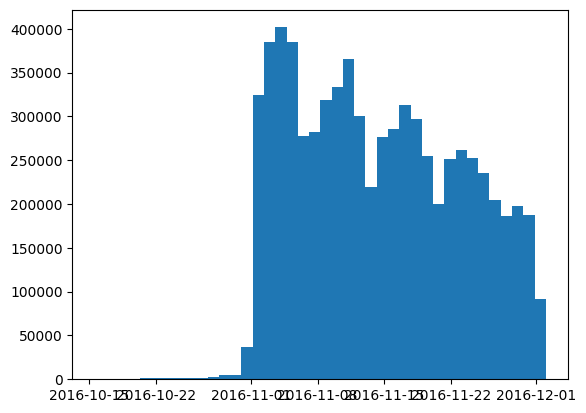

In [9]:
# After outlier removal
plt.hist(data['ts_listen'], bins=40)

{'whiskers': [<matplotlib.lines.Line2D at 0x7c9d6fab0c50>,
 'caps': [<matplotlib.lines.Line2D at 0x7c9d6fab1f10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c9d6fab0710>],
 'medians': [<matplotlib.lines.Line2D at 0x7c9d6fa93cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c9d6fab3410>],
 'means': []}

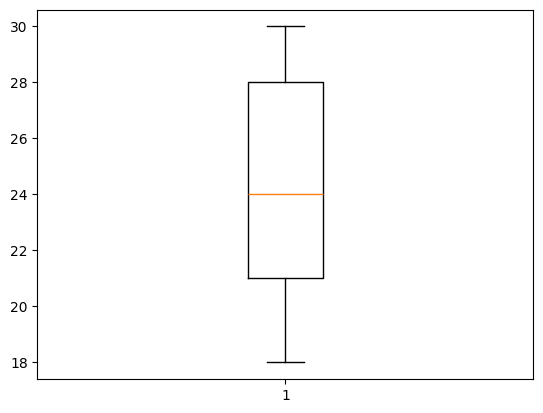

In [10]:
plt.boxplot(data['user_age']) # no outliers here. Ages between 18 and 30

## Sampling
Due to performance issues, it was not possible to perform complex calculations. therefore, it has been decided to only use a subset of the given data.
In this case, we want to keep the distribution in respect to the usage of users.

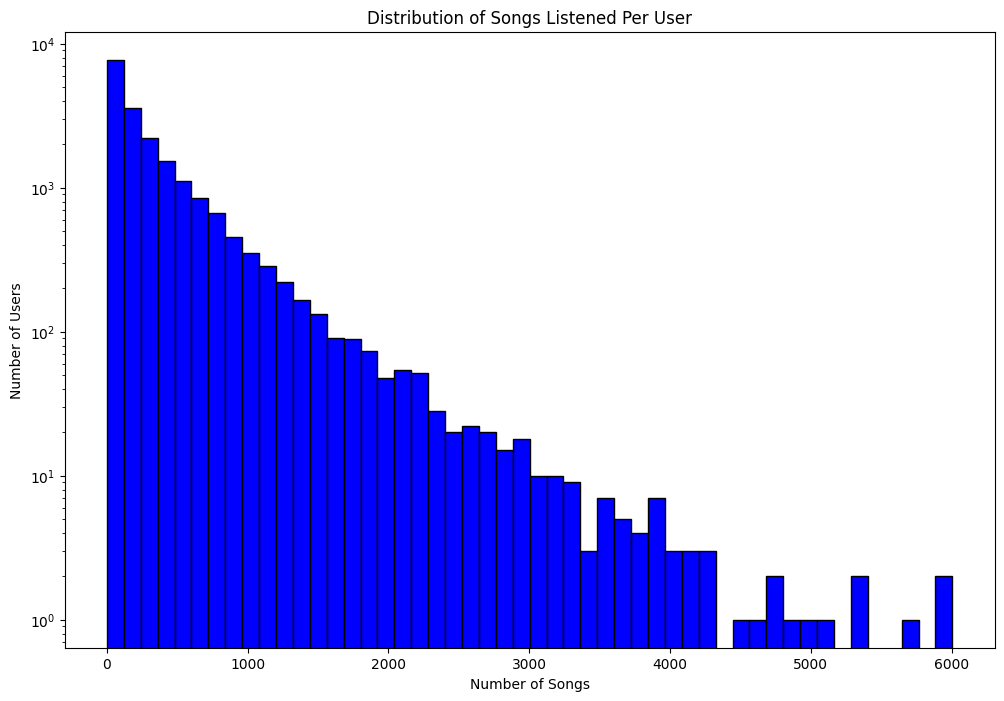

In [11]:
user_song_counts = data.groupby('user_id')['media_id'].count()

plt.figure(figsize=(12, 8))
plt.hist(user_song_counts, bins=50, color='blue', edgecolor='black')
plt.yscale('log')
plt.title('Distribution of Songs Listened Per User')
plt.xlabel('Number of Songs')
plt.ylabel('Number of Users')
plt.show()

## Dimension Reduction
For many features such as genre_id, artist_id, etc. there are several thousand unique values. Therefore, to not stretch our matrices unnecessarily and remove complexity, it has been decided to use minimum thresholds for specific categories which will reduce dimensions.

In [12]:
def remove_rare_records(data, col, threshold):
  # threshold = data.groupby(col).size().quantile(0.25)
  initial_count = len(data)  # Store the initial number of rows
  counts = data.groupby(col).size()
  filtered = counts[counts > threshold].index
  data_filtered = data[data[col].isin(filtered)]


  counts = data.groupby(col).size()  # Count occurrences of each value

  # Calculate removed rows and percentage
  removed_count = initial_count - len(data_filtered)
  removed_percentage = round((removed_count / initial_count) * 100, 2)
  print(f"Removed {removed_count} rows from `{col}` with fewer than {threshold} occurrences.")
  print(f"This corresponds to {removed_percentage}% of the dataset.\n")
  return data_filtered

filtered_data = remove_rare_records(data, 'media_id', data.groupby('media_id').size().quantile(0.25)) # removing songs that were only rarely listened
filtered_data = remove_rare_records(filtered_data, 'user_id', data.groupby('user_id').size().quantile(0.25)) # removing rather inactive users
filtered_data = remove_rare_records(filtered_data, 'genre_id', data.groupby('genre_id').size().quantile(0.25)) # removing rare genres

# Final dataset size comparison
initial_rows = len(data)
final_rows = len(filtered_data)
removed_rows = initial_rows - final_rows
removed_percentage = round((removed_rows / initial_rows) * 100, 2)

print(f"Total rows removed: {removed_rows} ({removed_percentage}% of the dataset).")
print(f"Final dataset size: {final_rows} rows (from {initial_rows} original rows).")

Removed 169775 rows from `media_id` with fewer than 1.0 occurrences.
This corresponds to 2.37% of the dataset.

Removed 141667 rows from `user_id` with fewer than 62.0 occurrences.
This corresponds to 2.03% of the dataset.

Removed 521 rows from `genre_id` with fewer than 2.0 occurrences.
This corresponds to 0.01% of the dataset.

Total rows removed: 311963 (4.36% of the dataset).
Final dataset size: 6838028 rows (from 7149991 original rows).


In [13]:
sampled_data = filtered_data.sample(frac=0.05, random_state=42).reset_index(drop=True)
print(len(sampled_data))

341901


## Feature Engineering

In [14]:
sampled_data['hour'] = sampled_data['ts_listen'].dt.hour
sampled_data['day'] = sampled_data['ts_listen'].dt.dayofweek

sampled_data['is_weekend'] = sampled_data['day'].isin([5, 6])

# Create time of day categories
def get_time_of_day(hour):
    if 5 <= hour < 12:
        return 'MORNING'
    elif 12 <= hour < 18:
        return 'AFTERNOON'
    elif 18 <= hour < 21:
        return 'EVENING'
    else:
        return 'NIGHT'

sampled_data['time_of_day'] = sampled_data['hour'].apply(get_time_of_day)
sampled_data['last_listen'] = sampled_data.groupby('user_id')['ts_listen'].diff().dt.total_seconds().abs().fillna(0)

# Release-related
sampled_data['days_since_release'] = (sampled_data['ts_listen'] - sampled_data['release_date']).dt.days

In [15]:
# Feature Engineering
sampled_data["genre_popularity"] = sampled_data.groupby('genre_id')['genre_id'].transform('count')
sampled_data["media_popularity"] = sampled_data.groupby('media_id')['media_id'].transform('count')
sampled_data["artist_popularity"] = sampled_data.groupby('artist_id')['artist_id'].transform('count')
sampled_data["album_popularity"] = sampled_data.groupby('album_id')['album_id'].transform('count')
sampled_data['songs_listened'] = sampled_data.groupby('user_id')['media_id'].transform('count')

# Not possible due to limited resources

# user_top_genre = sampled_data.groupby(['user_id', 'genre_id']).size().groupby(level=0).idxmax().apply(lambda x: x[1])
# sampled_data['user_top_genre'] = sampled_data['user_id'].map(user_top_genre)

# user_top_artist = sampled_data.groupby(['user_id', 'artist_id']).size().groupby(level=0).idxmax().apply(lambda x: x[1])
# sampled_data['user_top_artist'] = sampled_data['user_id'].map(user_top_artist)

# user_top_song = sampled_data.groupby(['user_id', 'media_id']).size().groupby(level=0).idxmax().apply(lambda x: x[1])
# sampled_data['user_top_song'] = sampled_data['user_id'].map(user_top_song)

In [16]:
# Time-Based Popularity (Last 7 Days)
max_timestamp = sampled_data['ts_listen'].max()  # Latest timestamp
seven_days_ago = max_timestamp - pd.Timedelta(days=7)  # 7-day window

# Filter data to include only the last 7 days
df_last_7_days = sampled_data[sampled_data['ts_listen'] >= seven_days_ago]

# Compute popularity in the last 7 days
song_popularity_7d = df_last_7_days['media_id'].value_counts().rename_axis('media_id').reset_index(name='song_popularity_7d')
artist_popularity_7d = df_last_7_days['artist_id'].value_counts().rename_axis('artist_id').reset_index(name='artist_popularity_7d')
album_popularity_7d = df_last_7_days['album_id'].value_counts().rename_axis('album_id').reset_index(name='album_popularity_7d')

# Merge the 7-day popularity back into the main dataset
sampled_data = sampled_data.merge(song_popularity_7d, on='media_id', how='left')
sampled_data = sampled_data.merge(artist_popularity_7d, on='artist_id', how='left')
sampled_data = sampled_data.merge(album_popularity_7d, on='album_id', how='left')

# Fill missing values (songs not played in the last 7 days → popularity = 0)
sampled_data[['song_popularity_7d', 'artist_popularity_7d', 'album_popularity_7d']] = sampled_data[
    ['song_popularity_7d', 'artist_popularity_7d', 'album_popularity_7d']
].fillna(0)

## Encoding

Due to high dimensionalities in features such as genre_id, media_id, etc, It has been decided to encode them.
One-Hot-Encoding was the initial approach but soon in the process, it has been realized that resources were not enough which have led to the following solution:

| Feature Type | Encoding Method | Reason |
|-------------|----------------|--------|
| **User (`user_id`)** | **Label Encoding** | Efficient for collaborative filtering models (ALS, NCF, LightFM) |
| **Item (`media_id`, `album_id`, `artist_id`)** | **Label Encoding** | Keeps item embeddings meaningful without excessive memory usage |
| **Context Features (`platform_name`, `platform_family`, `listen_type`, `context_type`)** | **Frequency Encoding** | Keeps distributions without adding many dimensions |
| **Genre (`genre_id`)** | **Label Encoding** | Captures user preferences good |
| **Time Features (`time_of_day`, `hour`, `is_weekend`, `days_since_release`)** | **Keep as is** | These are numerical and don’t need encoding |
| **Popularity Features (`song_popularity_7d`, `artist_popularity_7d`, `album_popularity_7d`)** | **Keep as is** | Useful for ranking and trend-based recommendations |

- Use Label Encoding for IDs (users, media, artists, albums)
- Use Frequency Encoding for categorical context features  
- Use Target Encoding for genres
- Keep numerical features unchanged



In [17]:
sampled_data.dtypes

,0
genre_id,category
ts_listen,datetime64[ns]
media_id,category
album_id,category
context_type,category
release_date,datetime64[ns]
platform_name,category
platform_family,category
media_duration,int64
listen_type,category


In [18]:
categorical_cols = ['genre_id', 'media_id', 'album_id', 'context_type',
                    'platform_name', 'platform_family', 'listen_type',
                    'user_id', 'artist_id', 'time_of_day']

# One-Hot Encoding the categorical columns - not possible due to memory usage.
# sampled_data_encoded = pd.get_dummies(sampled_data, columns=categorical_cols, drop_first=True)

In [19]:
from sklearn.preprocessing import LabelEncoder

# Copy the dataset to avoid modifying the original
encoded_data = sampled_data.copy()

# Label Encoding for IDs (User, Media, Artist, Album, Genre)
label_cols = ['user_id', 'media_id', 'album_id', 'artist_id', 'genre_id']

for col in label_cols:
    le = LabelEncoder()
    encoded_data[col] = le.fit_transform(encoded_data[col])

#Frequency Encoding for Context Features
freq_cols = ['platform_name', 'platform_family', 'listen_type', 'context_type']

for col in freq_cols:
    freq_map = encoded_data[col].value_counts(normalize=True)  # Normalize for proportion
    encoded_data[col] = encoded_data[col].map(freq_map)

## Normalization

In [21]:
from sklearn.preprocessing import MinMaxScaler

# List of numerical features to normalize
numerical_cols = [
    'media_duration', 'user_age', 'hour', 'day', 'days_since_release',
    'genre_popularity', 'media_popularity', 'artist_popularity', 'album_popularity',
    'songs_listened', 'song_popularity_7d', 'artist_popularity_7d', 'album_popularity_7d',
    'last_listen'  # Time difference in seconds
]

# Initialize the scaler
scaler = MinMaxScaler()

# Apply normalization
encoded_data[numerical_cols] = scaler.fit_transform(encoded_data[numerical_cols])

In [22]:
encoded_data['is_listened'] = encoded_data['is_listened'].astype(int)
encoded_data['user_gender'] = encoded_data['user_gender'].astype(int)
encoded_data['is_weekend'] = encoded_data['is_weekend'].astype(int)

# Splitting
As we are working with time series data, it has been decided to split on a specific date where the 80% will be used to train the model and 20% to test it.

In [27]:
encoded_data = encoded_data.sort_values(by='ts_listen')

# Find the date corresponding to the 80% percentile
split_date = encoded_data['ts_listen'].quantile(0.8)

# Train-test split based on calculated date
train = encoded_data[encoded_data['ts_listen'] < split_date]
test = encoded_data[encoded_data['ts_listen'] >= split_date]

# Print dataset sizes
print(f"Split Date: {split_date}")
print(f"{len(train)} interactions for TRAINING ({round(len(train) / len(encoded_data) * 100, 2)}%)")
print(f"{len(test)} interactions for TESTING ({round(len(test) / len(encoded_data) * 100, 2)}%)")

Split Date: 2016-11-23 10:38:22
273520 interactions for TRAINING (80.0%)
68381 interactions for TESTING (20.0%)


In [24]:
encoded_data

,genre_id,ts_listen,media_id,album_id,context_type,release_date,platform_name,platform_family,media_duration,listen_type,...,last_listen,days_since_release,genre_popularity,media_popularity,artist_popularity,album_popularity,songs_listened,song_popularity_7d,artist_popularity_7d,album_popularity_7d
0,284,2016-11-28 16:40:24,23564,11923,0.434585,2003-05-19,0.682990,0.804247,0.849138,0.686655,...,0.000000,0.117347,0.004263,0.004306,0.076506,0.006904,0.086538,0.009709,0.072015,0.005543
1,0,2016-11-17 23:19:07,61787,31783,0.434585,2016-07-22,0.175726,0.804247,0.560345,0.686655,...,0.000000,0.004582,1.000000,0.162540,0.070692,0.026730,0.163462,0.213592,0.057429,0.024390
2,411,2016-11-23 14:20:52,19290,9707,0.127203,2008-09-16,0.175726,0.804247,0.512931,0.686655,...,0.000000,0.071717,0.000100,0.000000,0.031316,0.000708,0.176282,0.000000,0.036463,0.000000
3,12,2016-11-24 14:19:09,42166,21691,0.029810,2014-10-27,0.682990,0.804247,0.487069,0.313345,...,0.000000,0.019566,0.048558,0.002153,0.041887,0.004957,0.028846,0.000000,0.046490,0.003326
4,0,2016-11-02 15:07:25,62038,31937,0.434585,2016-07-29,0.682990,0.804247,0.318966,0.686655,...,0.000000,0.004067,1.000000,0.077503,0.038848,0.012746,0.166667,0.000000,0.029170,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341896,0,2016-11-01 03:56:55,59219,30475,0.009073,2016-05-27,0.682990,0.804247,0.409483,0.686655,...,0.067697,0.005517,1.000000,0.219591,0.199128,0.123031,0.038462,0.184466,0.206928,0.110865
341897,0,2016-11-26 06:59:59,55954,28807,0.029810,2016-03-07,0.682990,0.804247,0.801724,0.313345,...,0.045108,0.007995,1.000000,0.005382,0.000925,0.000885,0.125000,0.009709,0.000912,0.001109
341898,32,2016-11-11 09:18:06,7628,3704,0.434585,2008-10-10,0.682990,0.804247,0.612069,0.686655,...,0.021153,0.070876,0.021727,0.021529,0.006739,0.004957,0.147436,0.019417,0.004558,0.003326
341899,0,2016-11-26 11:40:29,53044,27258,0.127203,2015-12-04,0.682990,0.804247,0.400862,0.686655,...,0.025838,0.010192,1.000000,0.013994,1.000000,0.148699,0.035256,0.048544,0.904284,0.148559


# Saving processed Datasets

In [28]:
train.to_csv('/content/drive/My Drive/Recommender/preprocessed_train.csv', index=False)
test.to_csv('/content/drive/My Drive/Recommender/preprocessed_test.csv', index=False)

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
